## Importing the libraries
> Here we import all the necessary libraries

In [60]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

## Loading the data
> Here we load data using pandas framework

In [68]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target'>

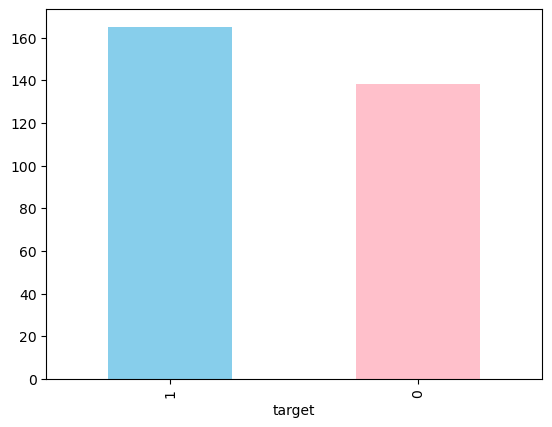

In [70]:
df.target.value_counts().plot(kind='bar', color = ['skyblue','pink'])

<Axes: xlabel='target'>

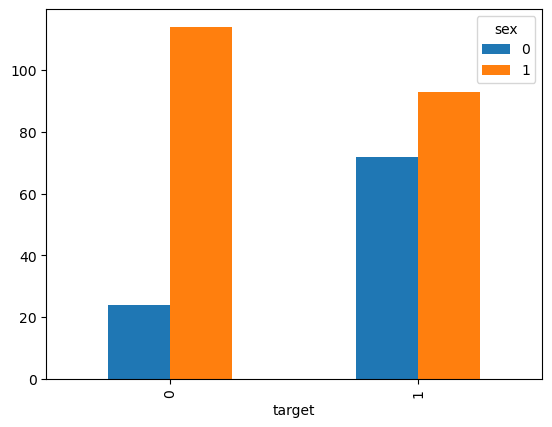

In [43]:
pd.crosstab(df.target,df.sex).plot.bar()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

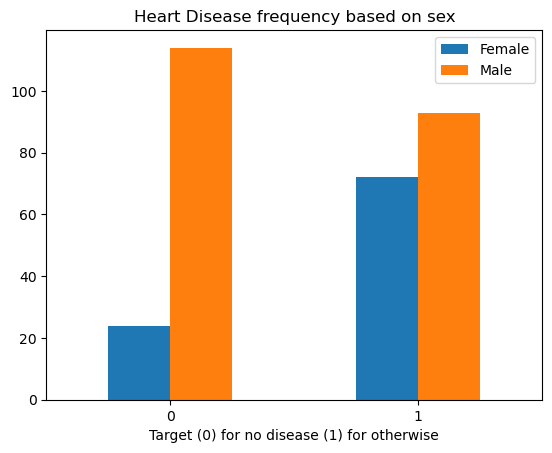

In [45]:
pd.crosstab(df.target,df.sex).plot.bar()
plt.title('Heart Disease frequency based on sex')
plt.xlabel('Target (0) for no disease (1) for otherwise')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0)

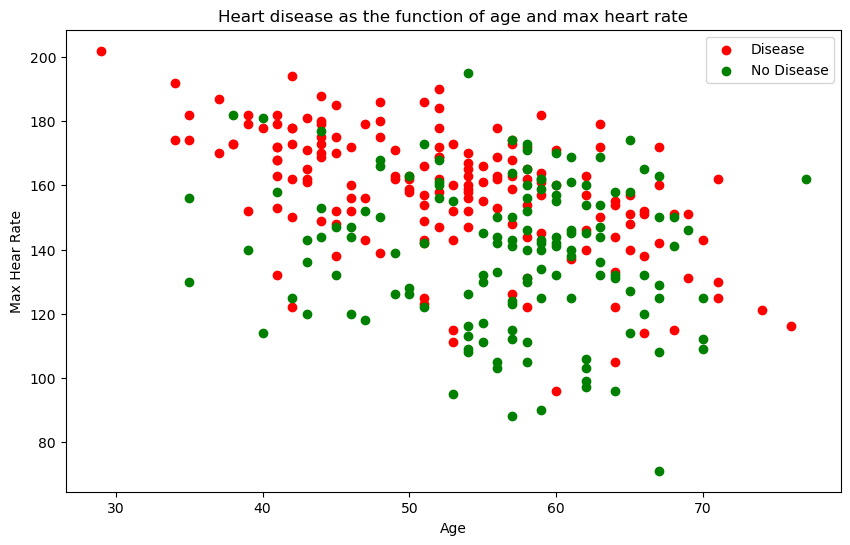

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1],c = 'red')
plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0],c = 'green')
plt.title('Heart disease as the function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Hear Rate')
plt.legend(['Disease','No Disease'])

<Axes: >

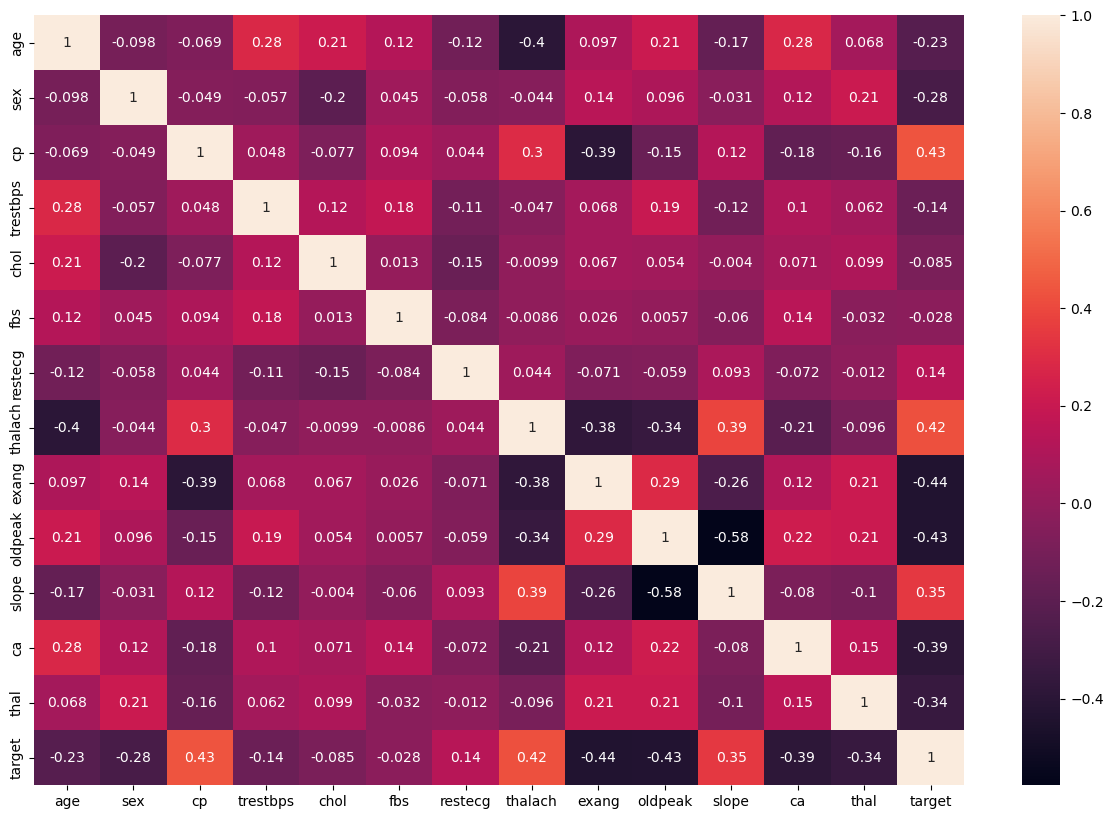

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True) # to visualize corr 

## Data preprocessing

In [55]:
y = df["target"]
X = df.drop("target", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modelling

In [72]:
models = {"knn": KNeighborsClassifier(),
          "LR": LogisticRegression(),
          "svm": SVC(),
          "rf": RandomForestClassifier()}

In [88]:
#Making a function that'll score the accuracy rates of all models in a dictionary
def fit_and_scores(models,X_train, X_test, y_train, y_test):
    models_scores ={}
    for name,model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test,y_test)
    return models_scores

In [90]:
model_scores=fit_and_scores(models,X_train, X_test, y_train, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

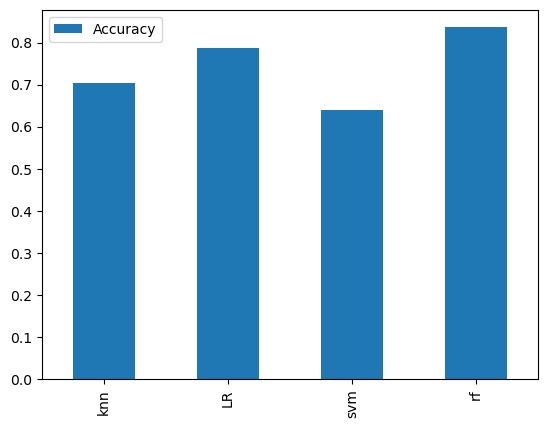

In [94]:
modelss = pd.DataFrame(model_scores, index =['Accuracy'])
modelss.T.plot.bar()